# 📊 01 - Data Exploration & Cleaning

**Week 1 Deliverable**: Comprehensive EDA + Clean Dataset

## Objectives
1. Load and understand the Online Retail dataset
2. Perform comprehensive exploratory data analysis
3. Clean and preprocess the data
4. Save cleaned data for further analysis

---

## 1. Setup & Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 2. Load Data

In [2]:
# Load the Online Retail dataset
df = pd.read_excel('../data/raw/Online Retail.xlsx')

print(f'Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f'Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

Dataset Shape: 541,909 rows × 8 columns
Memory Usage: 126.18 MB


In [3]:
# First look at the data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


In [4]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 3. Data Quality Assessment

In [5]:
# Check for missing values
missing = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

print('=== Missing Values Analysis ===')
missing[missing['Missing Count'] > 0]

=== Missing Values Analysis ===


,Missing Count,Missing %
CustomerID,135080,24.93
Description,1454,0.27


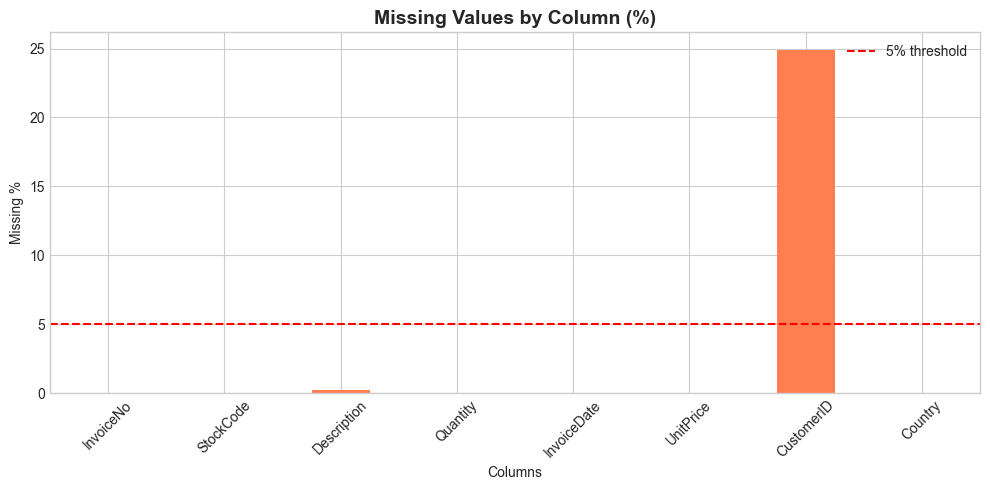

In [6]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 5))

missing_pct = (df.isnull().sum() / len(df) * 100)
missing_pct.plot(kind='bar', ax=ax, color='coral')

ax.set_title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns')
ax.set_ylabel('Missing %')
ax.axhline(y=5, color='red', linestyle='--', label='5% threshold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../data/processed/01_missing_values.png', dpi=300)
plt.show()

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)')

Duplicate Rows: 5,268 (0.97%)


## 4. Statistical Summary

In [8]:
# Descriptive statistics for numeric columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [10]:
# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Summary statistics
print('=== Revenue Statistics ===')
print(f"Total Revenue: £{df['Revenue'].sum():,.2f}")
print(f"Average Order Value: £{df['Revenue'].mean():,.2f}")
print(f"Median Order Value: £{df['Revenue'].median():,.2f}")

=== Revenue Statistics ===
Total Revenue: £9,747,747.93
Average Order Value: £17.99
Median Order Value: £9.75


## 5. Exploratory Data Analysis

### 5.1 Transaction Analysis

In [11]:
# Unique counts
print('=== Unique Counts ===')
print(f"Unique Invoices: {df['InvoiceNo'].nunique():,}")
print(f"Unique Customers: {df['CustomerID'].nunique():,}")
print(f"Unique Products: {df['StockCode'].nunique():,}")
print(f"Unique Countries: {df['Country'].nunique():,}")

=== Unique Counts ===
Unique Invoices: 25,900
Unique Customers: 4,372
Unique Products: 4,070
Unique Countries: 38


In [12]:
# Date range
print('=== Date Range ===')
print(f"Start Date: {df['InvoiceDate'].min()}")
print(f"End Date: {df['InvoiceDate'].max()}")
print(f"Date Range: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")

=== Date Range ===
Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00
Date Range: 373 days


### 5.2 Distribution Analysis

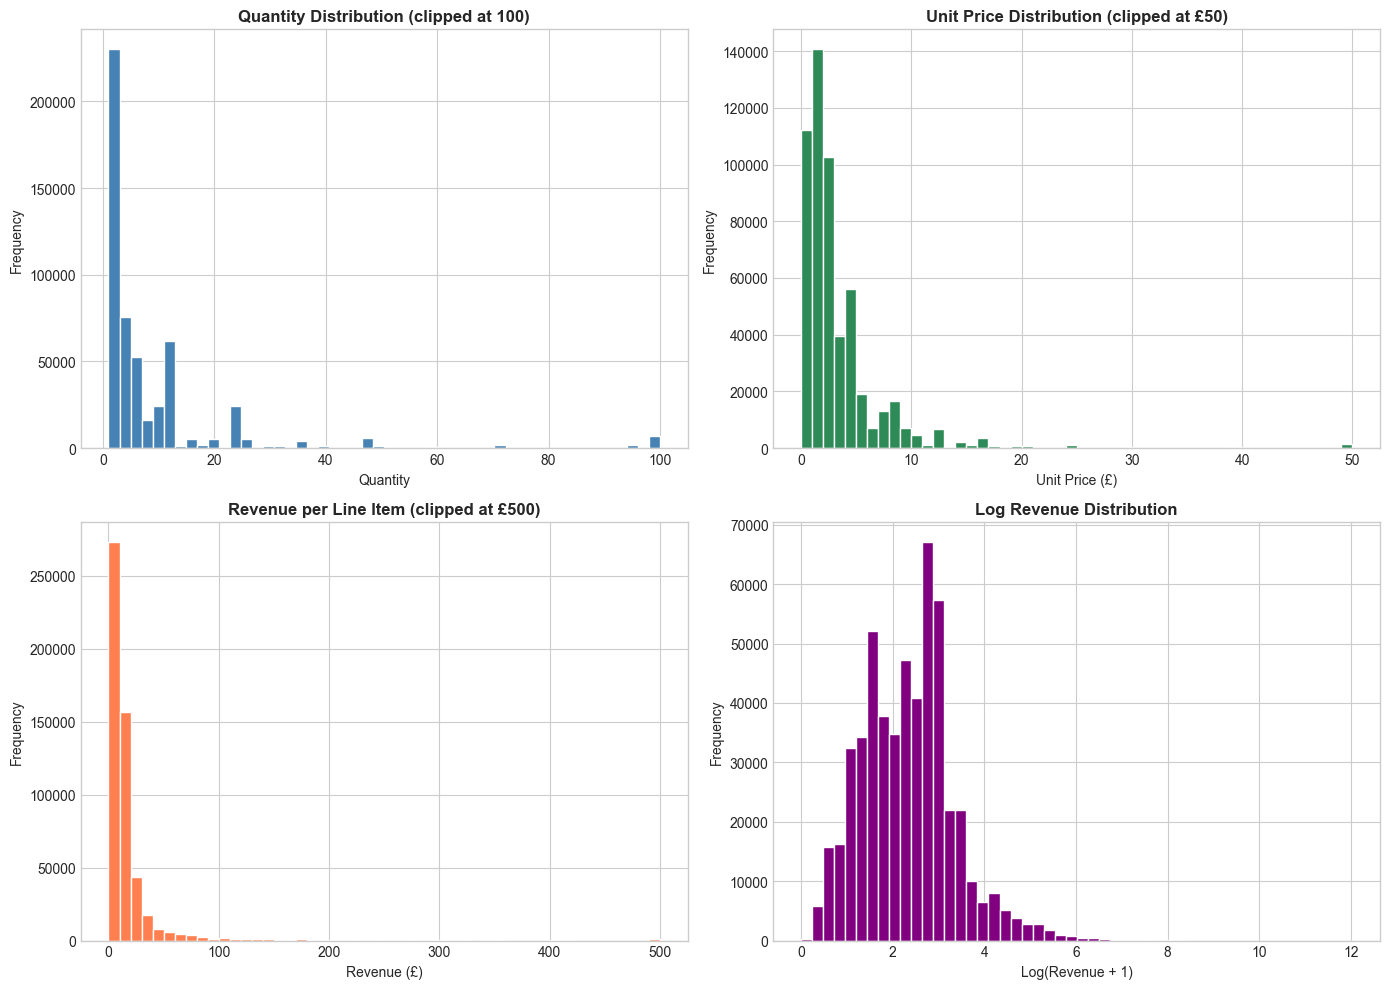

In [13]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quantity distribution
df[df['Quantity'] > 0]['Quantity'].clip(upper=100).hist(bins=50, ax=axes[0, 0], color='steelblue', edgecolor='white')
axes[0, 0].set_title('Quantity Distribution (clipped at 100)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')

# Unit Price distribution
df[df['UnitPrice'] > 0]['UnitPrice'].clip(upper=50).hist(bins=50, ax=axes[0, 1], color='seagreen', edgecolor='white')
axes[0, 1].set_title('Unit Price Distribution (clipped at £50)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Unit Price (£)')
axes[0, 1].set_ylabel('Frequency')

# Revenue distribution
df[df['Revenue'] > 0]['Revenue'].clip(upper=500).hist(bins=50, ax=axes[1, 0], color='coral', edgecolor='white')
axes[1, 0].set_title('Revenue per Line Item (clipped at £500)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Revenue (£)')
axes[1, 0].set_ylabel('Frequency')

# Log Revenue distribution
df[df['Revenue'] > 0]['Revenue'].apply(np.log1p).hist(bins=50, ax=axes[1, 1], color='purple', edgecolor='white')
axes[1, 1].set_title('Log Revenue Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Log(Revenue + 1)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../data/processed/02_distributions.png', dpi=300)
plt.show()

### 5.3 Time Series Analysis

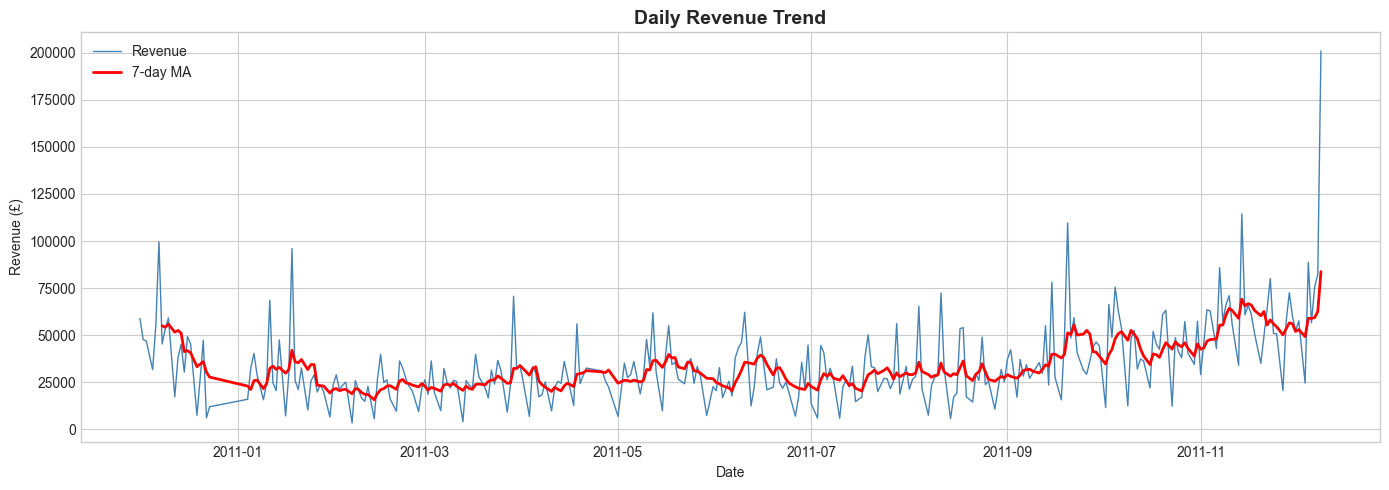

In [14]:
# Daily revenue trend
daily_revenue = df[df['Revenue'] > 0].groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()

fig, ax = plt.subplots(figsize=(14, 5))
daily_revenue.plot(ax=ax, color='steelblue', linewidth=1)
daily_revenue.rolling(7).mean().plot(ax=ax, color='red', linewidth=2, label='7-day MA')

ax.set_title('Daily Revenue Trend', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue (£)')
ax.legend()
plt.tight_layout()
plt.savefig('../data/processed/03_daily_revenue.png', dpi=300)
plt.show()

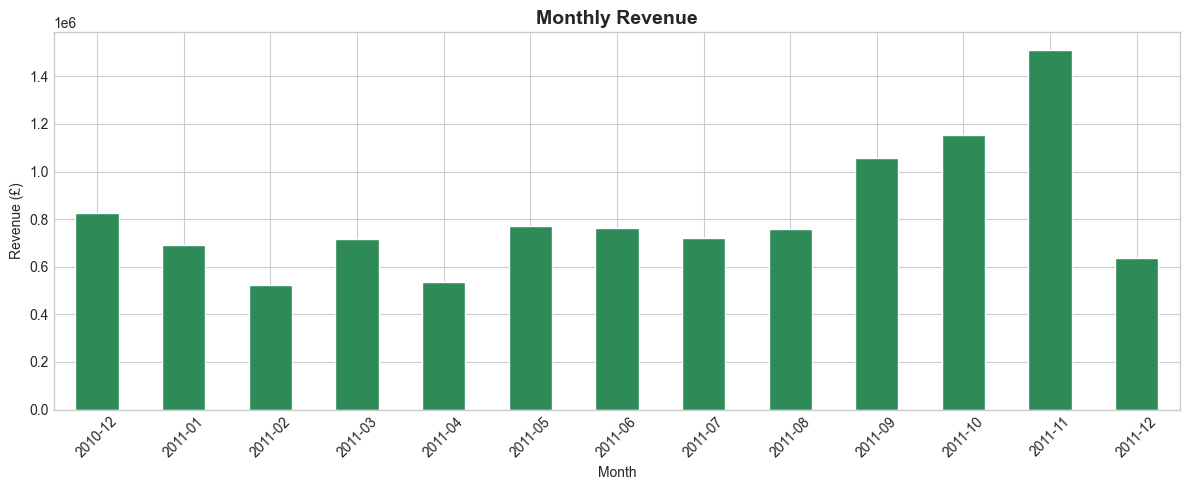

In [15]:
# Monthly revenue trend
monthly_revenue = df[df['Revenue'] > 0].groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

fig, ax = plt.subplots(figsize=(12, 5))
monthly_revenue.plot(kind='bar', ax=ax, color='seagreen', edgecolor='white')

ax.set_title('Monthly Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/processed/04_monthly_revenue.png', dpi=300)
plt.show()

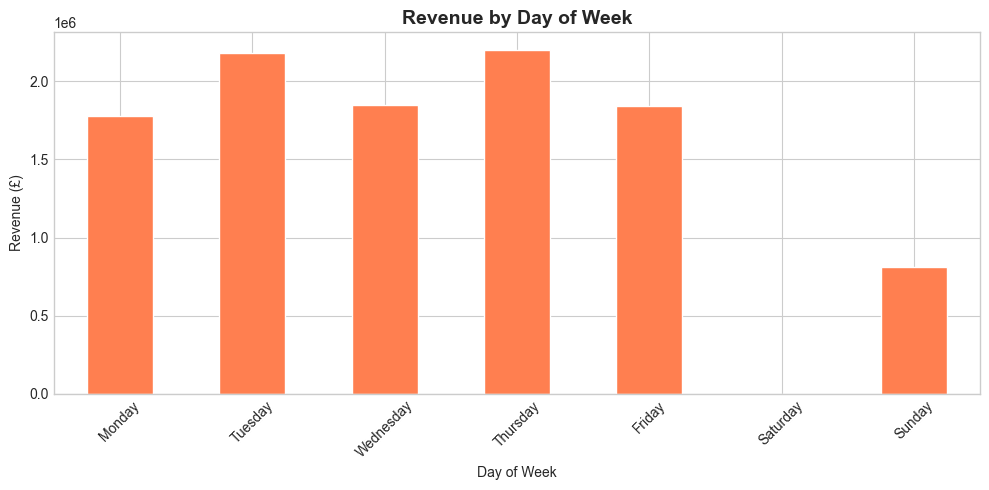

In [16]:
# Day of week analysis
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dow_revenue = df[df['Revenue'] > 0].groupby('DayOfWeek')['Revenue'].sum().reindex(dow_order)

fig, ax = plt.subplots(figsize=(10, 5))
dow_revenue.plot(kind='bar', ax=ax, color='coral', edgecolor='white')

ax.set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/processed/05_dow_revenue.png', dpi=300)
plt.show()

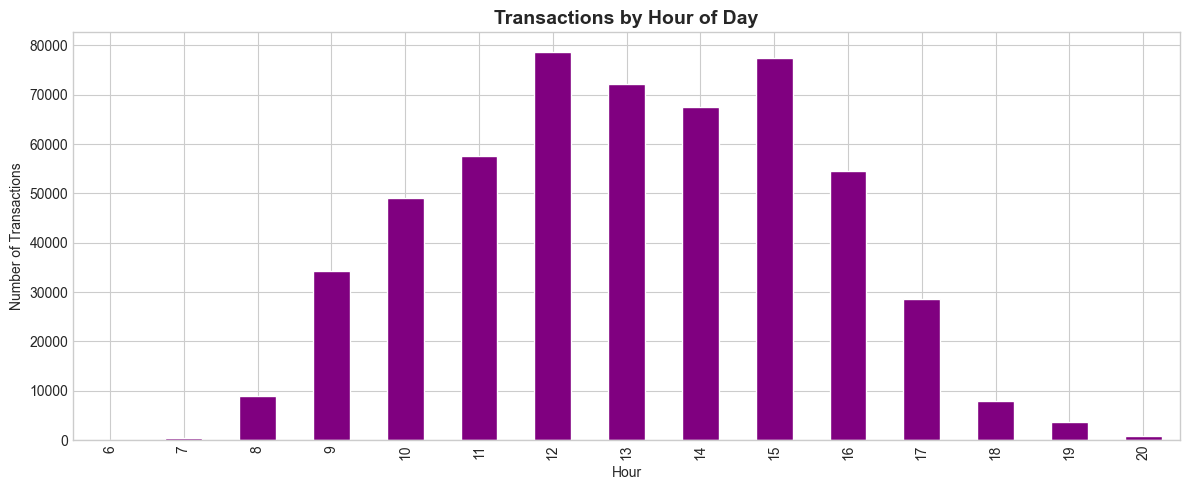

In [17]:
# Hourly pattern
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_transactions = df.groupby('Hour').size()

fig, ax = plt.subplots(figsize=(12, 5))
hourly_transactions.plot(kind='bar', ax=ax, color='purple', edgecolor='white')

ax.set_title('Transactions by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.savefig('../data/processed/06_hourly_transactions.png', dpi=300)
plt.show()

### 5.4 Geographic Analysis

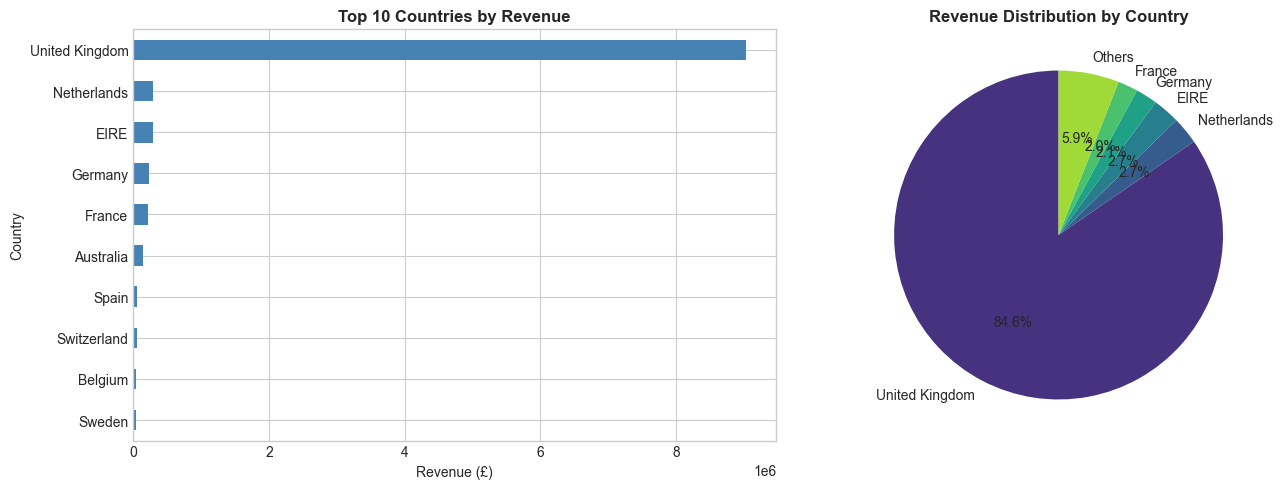

In [18]:
# Top 10 countries by revenue
country_revenue = df[df['Revenue'] > 0].groupby('Country')['Revenue'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue by country
country_revenue.head(10).plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Top 10 Countries by Revenue', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Revenue (£)')
axes[0].invert_yaxis()

# Pie chart for top 5
top5 = country_revenue.head(5)
others = country_revenue[5:].sum()
pie_data = pd.concat([top5, pd.Series({'Others': others})])

axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Revenue Distribution by Country', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/07_country_analysis.png', dpi=300)
plt.show()

In [19]:
# Country statistics
country_stats = df[df['Revenue'] > 0].groupby('Country').agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceNo': 'Orders',
    'CustomerID': 'Customers',
    'Revenue': 'Total Revenue'
}).sort_values('Total Revenue', ascending=False)

country_stats['Avg Order Value'] = country_stats['Total Revenue'] / country_stats['Orders']
country_stats.head(10)

,Orders,Customers,Total Revenue,Avg Order Value
Country,,,,
United Kingdom,18019,3920,9025222.08,500.87
Netherlands,94,9,285446.34,3036.66
EIRE,288,3,283453.96,984.22
Germany,457,94,228867.14,500.80
France,392,87,209715.11,534.99
Australia,57,9,138521.31,2430.20
Spain,90,30,61577.11,684.19
Switzerland,54,21,57089.90,1057.22
Belgium,98,25,41196.34,420.37


### 5.5 Product Analysis

In [20]:
# Top 10 products by revenue
product_revenue = df[df['Revenue'] > 0].groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False)

print('=== Top 10 Products by Revenue ===')
product_revenue.head(10)

=== Top 10 Products by Revenue ===


StockCode  Description                       
DOT        DOTCOM POSTAGE                       206248.77
22423      REGENCY CAKESTAND 3 TIER             174484.74
23843      PAPER CRAFT , LITTLE BIRDIE          168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER   104340.29
47566      PARTY BUNTING                         99504.33
85099B     JUMBO BAG RED RETROSPOT               94340.05
23166      MEDIUM CERAMIC TOP STORAGE JAR        81700.92
M          Manual                                78110.27
POST       POSTAGE                               78101.88
23084      RABBIT NIGHT LIGHT                    66964.99
Name: Revenue, dtype: float64

In [21]:
# Top 10 products by quantity sold
product_qty = df[df['Quantity'] > 0].groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)

print('=== Top 10 Products by Quantity ===')
product_qty.head(10)

=== Top 10 Products by Quantity ===


StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        78033
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
85099B     JUMBO BAG RED RETROSPOT               48478
85123A     WHITE HANGING HEART T-LIGHT HOLDER    37603
22197      POPCORN HOLDER                        36761
84879      ASSORTED COLOUR BIRD ORNAMENT         36461
21212      PACK OF 72 RETROSPOT CAKE CASES       36419
23084      RABBIT NIGHT LIGHT                    30788
22492      MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

### 5.6 Customer Analysis

In [22]:
# Customer statistics (excluding null CustomerID)
df_customers = df[df['CustomerID'].notna()].copy()

customer_stats = df_customers[df_customers['Revenue'] > 0].groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceNo': 'Orders',
    'Quantity': 'Items',
    'Revenue': 'Total Revenue'
})

print('=== Customer Statistics ===')
customer_stats.describe()

=== Customer Statistics ===


,Orders,Items,Total Revenue
count,4338.00,4338.00,4338.00
mean,4.27,1191.29,2054.27
std,7.70,5046.08,8989.23
min,1.00,1.00,3.75
25%,1.00,160.00,307.41
50%,2.00,379.00,674.49
75%,5.00,992.75,1661.74
max,209.00,196915.00,280206.02


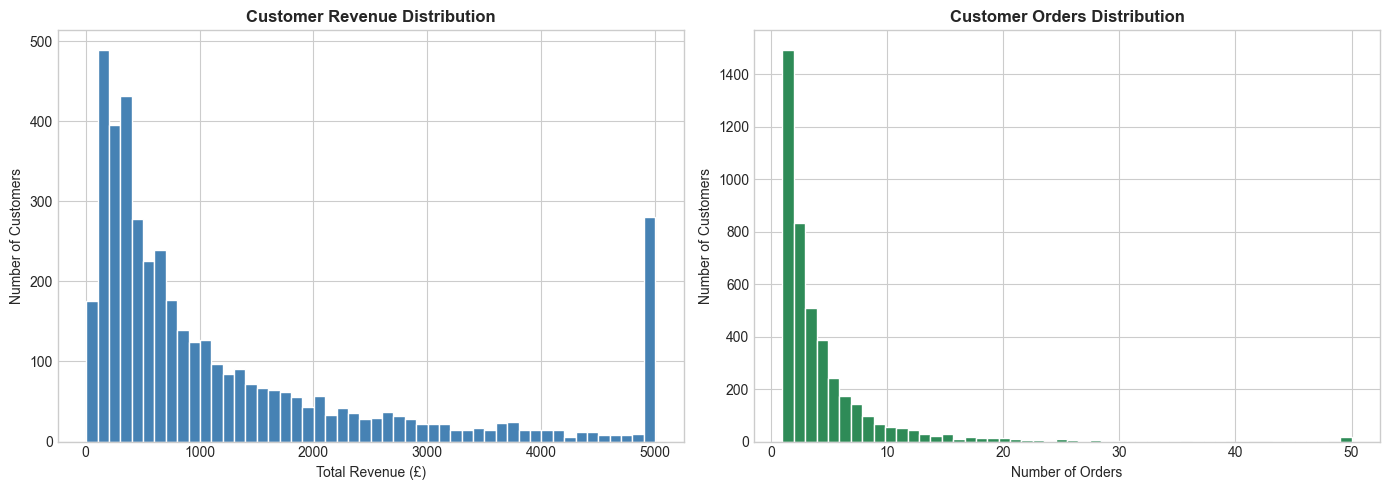

In [23]:
# Customer revenue distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue distribution
customer_stats['Total Revenue'].clip(upper=5000).hist(bins=50, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Customer Revenue Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Revenue (£)')
axes[0].set_ylabel('Number of Customers')

# Orders distribution
customer_stats['Orders'].clip(upper=50).hist(bins=50, ax=axes[1], color='seagreen', edgecolor='white')
axes[1].set_title('Customer Orders Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.savefig('../data/processed/08_customer_distribution.png', dpi=300)
plt.show()

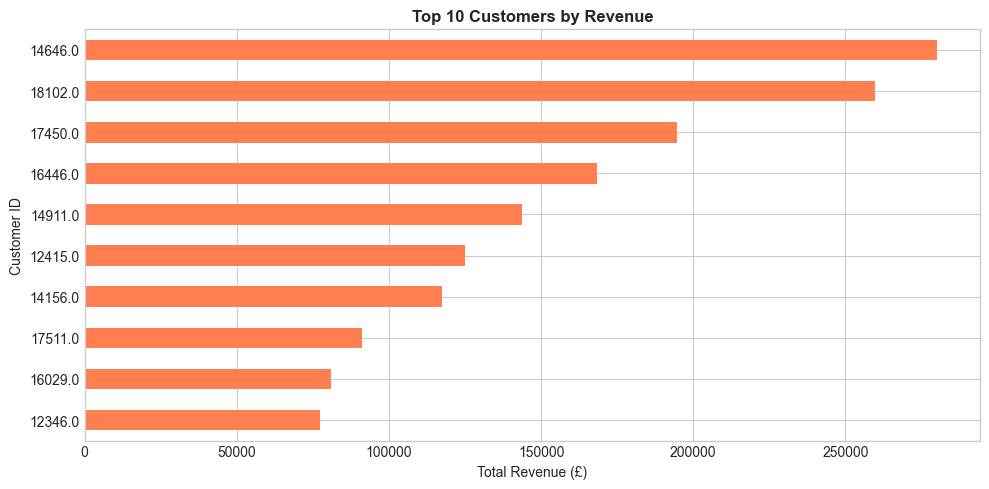

In [24]:
# Top 10 customers by revenue
top_customers = customer_stats.sort_values('Total Revenue', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))
top_customers['Total Revenue'].plot(kind='barh', ax=ax, color='coral')
ax.set_title('Top 10 Customers by Revenue', fontsize=12, fontweight='bold')
ax.set_xlabel('Total Revenue (£)')
ax.set_ylabel('Customer ID')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../data/processed/09_top_customers.png', dpi=300)
plt.show()

## 6. Data Cleaning

In [25]:
# Create a copy for cleaning
df_clean = df.copy()

print(f'Original shape: {df_clean.shape}')

Original shape: (541909, 11)


In [26]:
# Step 1: Remove rows with missing CustomerID
df_clean = df_clean[df_clean['CustomerID'].notna()]
print(f'After removing null CustomerID: {df_clean.shape}')

After removing null CustomerID: (406829, 11)


In [27]:
# Step 2: Remove cancelled orders (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
print(f'After removing cancellations: {df_clean.shape}')

After removing cancellations: (397924, 11)


In [28]:
# Step 3: Remove negative or zero quantities
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f'After removing negative quantities: {df_clean.shape}')

After removing negative quantities: (397924, 11)


In [29]:
# Step 4: Remove negative or zero unit prices
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f'After removing negative prices: {df_clean.shape}')

After removing negative prices: (397884, 11)


In [30]:
# Step 5: Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f'After removing duplicates: {df_clean.shape}')

After removing duplicates: (392692, 11)


In [31]:
# Step 6: Recalculate Revenue
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']
print(f'Revenue column updated')

Revenue column updated


In [32]:
# Step 7: Convert CustomerID to integer
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
print(f'CustomerID converted to integer')

CustomerID converted to integer


In [33]:
# Cleaning summary
print('\n=== Cleaning Summary ===')
print(f'Original rows: {len(df):,}')
print(f'Clean rows: {len(df_clean):,}')
print(f'Rows removed: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)')
print(f'\nClean data statistics:')
print(f'  - Unique customers: {df_clean["CustomerID"].nunique():,}')
print(f'  - Unique invoices: {df_clean["InvoiceNo"].nunique():,}')
print(f'  - Total revenue: £{df_clean["Revenue"].sum():,.2f}')


=== Cleaning Summary ===
Original rows: 541,909
Clean rows: 392,692
Rows removed: 149,217 (27.5%)

Clean data statistics:
  - Unique customers: 4,338
  - Unique invoices: 18,532
  - Total revenue: £8,887,208.89


## 7. Outlier Analysis

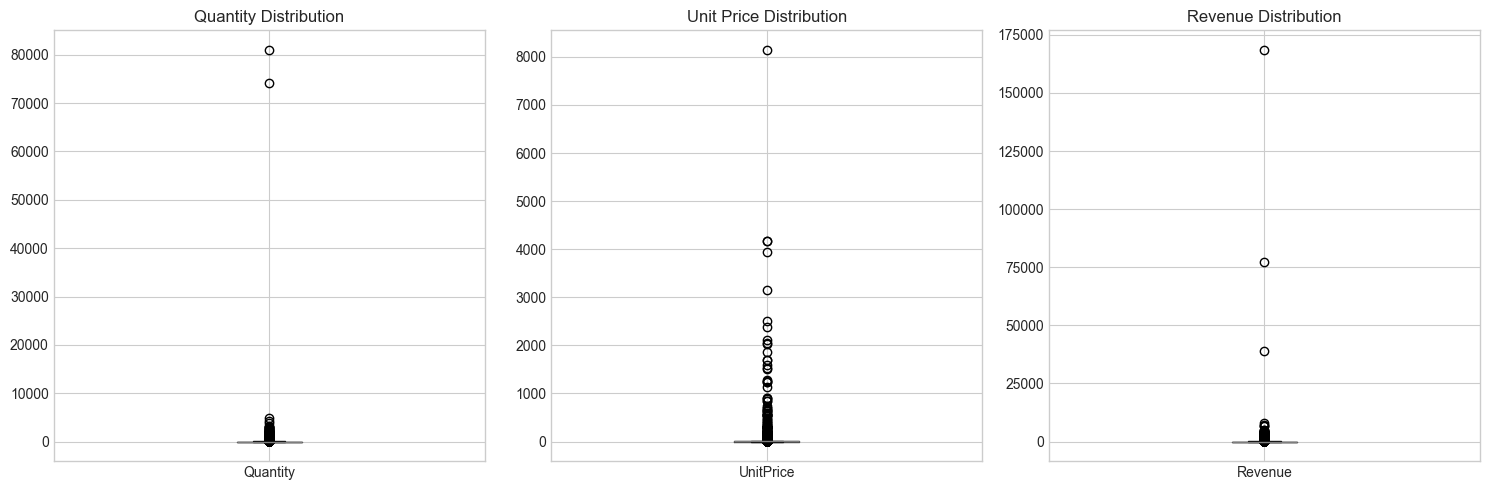

In [34]:
# Box plots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_clean.boxplot(column='Quantity', ax=axes[0])
axes[0].set_title('Quantity Distribution')

df_clean.boxplot(column='UnitPrice', ax=axes[1])
axes[1].set_title('Unit Price Distribution')

df_clean.boxplot(column='Revenue', ax=axes[2])
axes[2].set_title('Revenue Distribution')

plt.tight_layout()
plt.savefig('../data/processed/10_boxplots.png', dpi=300)
plt.show()

In [35]:
# Identify extreme outliers using IQR
def detect_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers), lower, upper

for col in ['Quantity', 'UnitPrice', 'Revenue']:
    count, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f'{col}: {count:,} outliers (bounds: {lower:.2f} - {upper:.2f})')

Quantity: 25,616 outliers (bounds: -13.00 - 27.00)
UnitPrice: 34,112 outliers (bounds: -2.50 - 7.50)
Revenue: 31,231 outliers (bounds: -17.32 - 42.07)


## 8. Save Cleaned Data

In [36]:
# Save cleaned dataset
df_clean.to_csv('../data/processed/online_retail_clean.csv', index=False)
print('Cleaned data saved to: data/processed/online_retail_clean.csv')

Cleaned data saved to: data/processed/online_retail_clean.csv


In [37]:
# Create customer summary for further analysis
customer_summary = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'InvoiceDate': ['min', 'max'],
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Country': 'first'
})

customer_summary.columns = ['Orders', 'FirstPurchase', 'LastPurchase', 'TotalItems', 'TotalRevenue', 'Country']
customer_summary = customer_summary.reset_index()

# Save customer summary
customer_summary.to_csv('../data/processed/customer_summary.csv', index=False)
print('Customer summary saved to: data/processed/customer_summary.csv')
print(f'Shape: {customer_summary.shape}')

Customer summary saved to: data/processed/customer_summary.csv
Shape: (4338, 7)


## 9. Key Insights Summary

In [39]:
# Summary statistics
print('=' * 60)
print('KEY INSIGHTS FROM DATA EXPLORATION')
print('=' * 60)

print('\n Dataset Overview:')
print(f'   • Original records: {len(df):,}')
print(f'   • Clean records: {len(df_clean):,}')
print(f'   • Date range: {df_clean["InvoiceDate"].min().strftime("%Y-%m-%d")} to {df_clean["InvoiceDate"].max().strftime("%Y-%m-%d")}')

print('\n Customer Insights:')
print(f'   • Total customers: {df_clean["CustomerID"].nunique():,}')
print(f'   • Average orders per customer: {df_clean.groupby("CustomerID")["InvoiceNo"].nunique().mean():.1f}')
print(f'   • Average revenue per customer: £{df_clean.groupby("CustomerID")["Revenue"].sum().mean():,.2f}')

print('\n Revenue Insights:')
print(f'   • Total revenue: £{df_clean["Revenue"].sum():,.2f}')
print(f'   • Average order value: £{df_clean.groupby("InvoiceNo")["Revenue"].sum().mean():,.2f}')
print(f'   • Top country: {df_clean.groupby("Country")["Revenue"].sum().idxmax()}')

print('\n Product Insights:')
print(f'   • Unique products: {df_clean["StockCode"].nunique():,}')
print(f'   • Average items per order: {df_clean.groupby("InvoiceNo")["Quantity"].sum().mean():.1f}')

print('\n Time Patterns:')
print(f'   • Peak day: {df_clean.groupby("DayOfWeek").size().idxmax()}')
print(f'   • Peak hour: {df_clean.groupby("Hour").size().idxmax()}:00')

print('\n' + '=' * 60)

KEY INSIGHTS FROM DATA EXPLORATION

 Dataset Overview:
   • Original records: 541,909
   • Clean records: 392,692
   • Date range: 2010-12-01 to 2011-12-09

 Customer Insights:
   • Total customers: 4,338
   • Average orders per customer: 4.3
   • Average revenue per customer: £2,048.69

 Revenue Insights:
   • Total revenue: £8,887,208.89
   • Average order value: £479.56
   • Top country: United Kingdom

 Product Insights:
   • Unique products: 3,665
   • Average items per order: 278.0

 Time Patterns:
   • Peak day: Thursday
   • Peak hour: 12:00



## 10. Next Steps

With the cleaned data, we can now proceed to:

1. **Notebook 02**: Cohort Analysis - analyze customer retention patterns
2. **Notebook 03**: RFM Segmentation - segment customers based on Recency, Frequency, Monetary
3. **Notebook 04**: Feature Engineering - create features for CLV modeling

---

**Files Created:**
- `data/processed/online_retail_clean.csv` - Cleaned transaction data
- `data/processed/customer_summary.csv` - Customer-level summary
- Various visualization files in `data/processed/`